In [31]:
import os
import yaml
import pandas as pd
import numpy as np
import sqlalchemy

import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display 
pd.options.display.max_columns = None
%matplotlib inline

In [2]:
with open('db_default_profile.yaml') as fd:
    config = yaml.load(fd)
    dburl = sqlalchemy.engine.url.URL(
        "postgres",
        host=config["host"],
        username=config["user"],
        database='johnson_county_ddj',
        password=config["pass"],
        port=config["port"],
    )
    engine_joco = sqlalchemy.create_engine(dburl, poolclass=sqlalchemy.pool.QueuePool)

## JoCo Consistent y-axes

In [125]:
# load the previous results data

import pickle

with open('../johnson-county-ddj/data_exploration/kit_bias_testbed/joco_recall_adj_data.pkl', 'rb') as f:
    load_dict = pickle.load(f)

joco_ts_df4  = load_dict['time_series_plot_df']
joco_ts_df   = load_dict['list_size_plot_df']
joco_myRA2   = load_dict['recall_adjuster_obj']
# conn = connect()
# myRA.engine = conn

del(load_dict)

In [126]:
ts_no_decoup = joco_ts_df4.loc[joco_ts_df4['strategy'] != 'Composite w/ Decoupled - Adjusted', ].copy()
ls_no_decoup = joco_ts_df.loc[joco_ts_df['strategy'] != 'Composite w/ Decoupled - Adjusted', ].copy()

In [128]:
import matplotlib.dates as mdates

months = mdates.MonthLocator([4,8,12])  # every month
months_fmt = mdates.DateFormatter('%b %y')

In [129]:
ts_no_decoup['strategy'] = ts_no_decoup['strategy'].map({
    'Best Unadjusted Metric - Unadjusted': 'Unmitigated', 
    'Best Adjusted Metric - Adjusted': 'Mitigated - Single Model', 
    'Composite Model - Adjusted': 'Mitigated - Composite Model',
    'Best Unadjusted Metric - Adjusted': 'Mitigated - Unadj. Model Seln.'
})

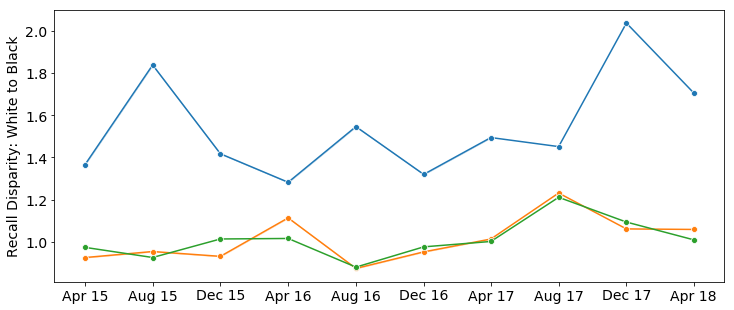

In [138]:
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=ts_no_decoup.loc[ts_no_decoup['strategy'] != 'Mitigated - Unadj. Model Seln.', ], x='train_end_time', y='recall_w_to_b', hue='strategy', marker="o", ax=ax)

ax.set_ylabel('Recall Disparity: White to Black', fontsize=14)
ax.set_xlabel('')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

ax.set_ylim((0.81,2.1))

# ax.text(0.02, 0.88, 'B', fontsize=28, transform=ax.transAxes)

ax.get_legend().remove()

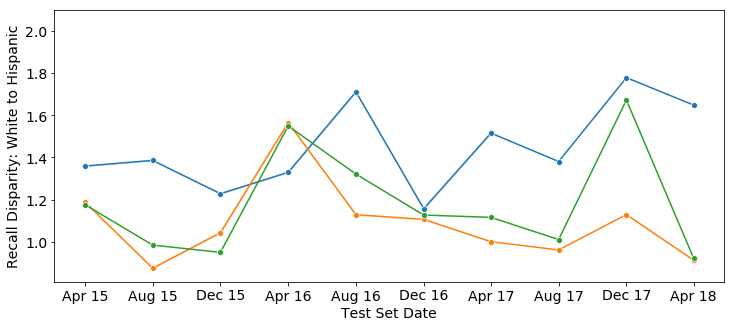

In [139]:
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=ts_no_decoup.loc[ts_no_decoup['strategy'] != 'Mitigated - Unadj. Model Seln.', ], x='train_end_time', y='recall_w_to_h', hue='strategy', marker="o", ax=ax)

ax.set_ylabel('Recall Disparity: White to Hispanic', fontsize=14)
ax.set_xlabel('Test Set Date', fontsize=14)

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# ax.text(0.02, 0.88, 'C', fontsize=28, transform=ax.transAxes)

ax.set_ylim((0.81,2.1))

ax.get_legend().remove()

In [140]:
ls_no_decoup['strategy'] = ls_no_decoup['strategy'].map({
    'Best Unadjusted Metric - Unadjusted': 'Unmitigated', 
    'Best Adjusted Metric - Adjusted': 'Mitigated - Single Model', 
    'Composite Model - Adjusted': 'Mitigated - Composite Model',
    'Best Unadjusted Metric - Adjusted': 'Mitigated - Unadj. Model Seln.'
})

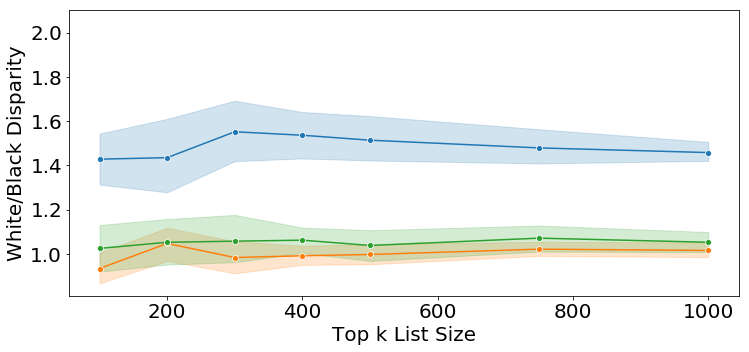

In [147]:
fig, ax = plt.subplots(figsize=(12,5.25))
sns.lineplot(data=ls_no_decoup.loc[ls_no_decoup['strategy'] != 'Mitigated - Unadj. Model Seln.', ], x='list_size', y='recall_w_to_b', hue='strategy', marker="o", ax=ax)

ax.set_ylabel('White/Black Disparity', fontsize=20)
ax.set_xlabel('Top k List Size', fontsize=20)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

ax.set_ylim((0.81,2.1))

# ax.text(0.02, 0.88, 'A', fontsize=34, transform=ax.transAxes)

ax.get_legend().remove()

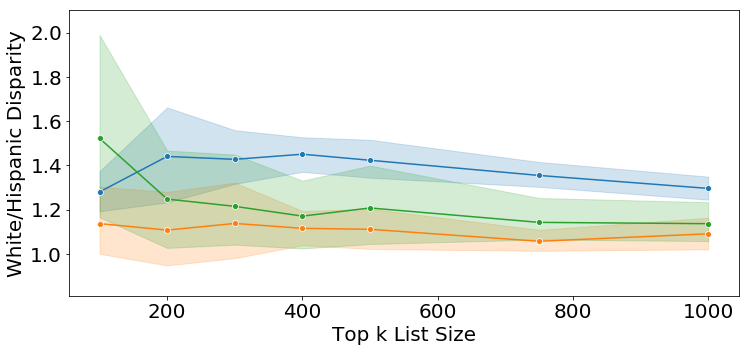

In [148]:
fig, ax = plt.subplots(figsize=(12,5.25))
sns.lineplot(data=ls_no_decoup.loc[ls_no_decoup['strategy'] != 'Mitigated - Unadj. Model Seln.', ], x='list_size', y='recall_w_to_h', hue='strategy', marker="o", ax=ax)

ax.set_ylabel('White/Hispanic Disparity', fontsize=20)
ax.set_xlabel('Top k List Size', fontsize=20)

ax.yaxis.set_ticks([1.0, 1.2, 1.4, 1.6, 1.8, 2.0])

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

ax.set_ylim((0.81,2.1))

# ax.text(0.95, 0.88, 'B', fontsize=34, transform=ax.transAxes)

ax.get_legend().remove()